## Examen de cinturón AML – Opción A
Descripción del examen:
En este examen, trabajarás con un dataset reciente de complejidad baja, donde primero realizarás un análisis no supervisado utilizando K-means o PCA, y luego modelarás el conjunto de datos utilizando un Perceptrón Multicapa (MLP). El objetivo es aplicar técnicas de clustering o reducción de dimensionalidad para analizar los datos, seguido de la implementación de un modelo MLP para realizar predicciones.

Dataset:
El dataset utilizado para este examen es el «Customer Personality Analysis» disponible en Kaggle. Este conjunto de datos contiene información demográfica y de comportamiento de clientes, con el objetivo de agruparlos y predecir sus patrones de compra.
Enlace al dataset: https://www.kaggle.com/imakash3011/customer-personality-analysis

Instrucciones:
1. Exploración y preprocesamiento de datos:
  – Carga y explora el dataset para identificar las variables más relevantes. Las características incluyen información demográfica como la edad, el ingreso, el estado civil, y datos de comportamiento de compra, como la cantidad gastada en diferentes productos.
  – Asegúrate de manejar los valores nulos y realizar un preprocesamiento adecuado, como la normalización de los datos para el análisis posterior.

2. Análisis no supervisado:
  – Selecciona un enfoque de análisis no supervisado: K-means o PCA.
    – K-means: Si seleccionas K-means, determina el número óptimo de clusters utilizando el método del codo o el silhouette score. Agrupa a los clientes en diferentes clusters y analiza cómo se dividen según sus características demográficas y de compra.
    – PCA: Si eliges PCA, realiza una reducción de dimensionalidad para capturar al menos el 90% de la varianza explicada. Proyecta los datos en los primeros componentes principales y visualiza cómo se agrupan los clientes en el nuevo espacio de características.

3. Modelado con MLP:
  – Implementa un Perceptrón Multicapa (MLP) para predecir las compras futuras de los clientes o su probabilidad de realizar una compra en una categoría específica de productos.
  – Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de tener una proporción adecuada de cada clase en el conjunto de datos.
  – Discute la arquitectura de tu MLP, incluyendo el número de capas ocultas, el número de neuronas en cada capa, y las funciones de activación utilizadas.

4. Evaluación del modelo:
  – Evalúa el modelo MLP utilizando métricas de clasificación como la precisión, el recall, el F1-score y la matriz de confusión. Asegúrate de comparar estas métricas entre el conjunto de entrenamiento y el conjunto de prueba para identificar cualquier posible sobreajuste.
  – Visualiza las curvas de aprendizaje que muestren la pérdida y la precisión a lo largo del entrenamiento.

5. Discusión y análisis:
  – Reflexiona sobre los resultados del análisis no supervisado y el modelo MLP. ¿Qué insights obtuviste de los clusters o los componentes principales? ¿Cómo se relacionan con el comportamiento de los clientes?
  – Discute el rendimiento del modelo MLP. ¿Es adecuado para este tipo de datos? ¿Cómo podrías mejorarlo?

6. Entrega final:
  – Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación del modelo y conclusiones. Asegúrate de que el informe sea claro y estructurado, con visualizaciones que apoyen tu análisis.

In [263]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam



## 1. Exploración y preprocesamiento de **datos**

In [264]:
# Cargar el dataset
df_train = pd.read_csv('marketing_campaign.csv',sep='\t')

# Explorar el dataset
# Características del dataset
print("--- Información del Dataset ---")
print(f"Forma del dataset: {df_train.shape}")
print("\n--- Mostrar las primeras filas del dataset ---")
print(df_train.head())
print("\n--- Verificar las columnas del dataset ---")
print(df_train.columns)
print("\n--- Tipos de Datos ---")
print(df_train.dtypes)

# Identificar valores faltantes
print("\n--- Valores faltantes por columna ---")
print(df_train.isnull().sum())

# Identificar filas duplicadas
duplicate_rows = df_train.duplicated().sum()
print(f"\n--- Filas duplicadas ---\n{duplicate_rows} filas duplicadas encontradas.")


--- Información del Dataset ---
Forma del dataset: (2240, 29)

--- Mostrar las primeras filas del dataset ---
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...              

In [265]:
#Descripción de estadísticas del dataset
df_train.describe()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [266]:
#Descripción de las columnas object
df_train.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


**Observaciones preliminares:**

* El conjunto de datos contiene 2240 filas, 29 columnas.

* De las 29 columnas, sólo tres son categóricas: Education, Marital_Status y Dt_Customer.

* Se puede ver que la columna Income posee 24 valores nulos.

* No existen duplicados.

* Las columnas Z_CostContact y Z_Revenue poseen sólo un valor en todas sus filas, 3 y 11 respectivamente.


**EDA**

Antes de visualizar los datos, se procede a revisar la proporción de nulos. Se puede ver que sólo representa el 1.1% con respecto al total de datos, por esta razón, se decide eliminar estos valores.

In [267]:
porc_nulos = (df_train.isnull().sum() / df_train.shape[0]) * 100
print(porc_nulos)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64


In [268]:
# Eliminación de nulos

df_train.dropna(inplace=True)

In [269]:
df_train.shape

(2216, 29)

Se revisa la columna ID para verificar que no existan duplicados de la misma e indique efectivamente que hay un ID para cada cliente.

In [270]:
df_train['ID'].duplicated().sum() #Efectivamente no existen filas duplicadas.

0

Se decide eliminar las columnas Z_CostContact y Z_Revenue debido a que la información que ofrecen no es muy relevante.

In [271]:
df_train.drop(['Z_Revenue','Z_CostContact'],axis=1,inplace=True)

**Revisión de columnas categóricas**: Se revisan las columnas Marital_Status, Education y Dt_Customer

In [272]:
df_train['Marital_Status'].value_counts()



,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


**Observaciones:** Se puede ver que existen valores como Alone, Absurd o YOLO que podrían agruparse con Single, así mismo, Divorced o Widow también podrían encajar en esta agrupación. También podrían agruparse Married y Together en una sóla categoría.

In [273]:
df_train['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


**Observaciones:** Se podría generar una categoría para agrupar todos los post-graduados y otra para los no-graduados.

In [274]:
df_train['Dt_Customer'].value_counts()

,count
Dt_Customer,
31-08-2012,12
12-09-2012,11
14-02-2013,11
12-05-2014,11
20-08-2013,10
...,...
05-08-2012,1
18-11-2012,1
09-05-2014,1


**Observaciones:** No hay ninguna observación relevante para los valores de esta columna.

**Feature Engineering de las variables categóricas**

Marital_Status

In [275]:
# Se agrupan las categorías Alone, Absurd y YOLO a Single, también se crea Engaged para agrupar a Married y Together.
df_train['Marital_Status'] = df_train['Marital_Status'].replace({'Alone':'Single','YOLO':'Single','Absurd':'Single'})
df_train['Marital_Status'] = df_train['Marital_Status'].replace({'Married':'Engaged','Together':'Engaged'})
df_train['Marital_Status'].value_counts()

,count
Marital_Status,
Engaged,1430
Single,478
Divorced,232
Widow,76


Education

In [276]:
# Se crean dos agrupaciones, post-graduation y under-graduation para agrupar a los valores, se deja graduation sólo
df_train['Education'] = df_train['Education'].replace({'Graduation':'Graduation','PhD':'Post-Graduation','Master':'Post-Graduation','Basic':'Under-Graduation','2n Cycle':'Under-Graduation'})
df_train['Education'].value_counts()

,count
Education,
Graduation,1116
Post-Graduation,846
Under-Graduation,254


Visualización

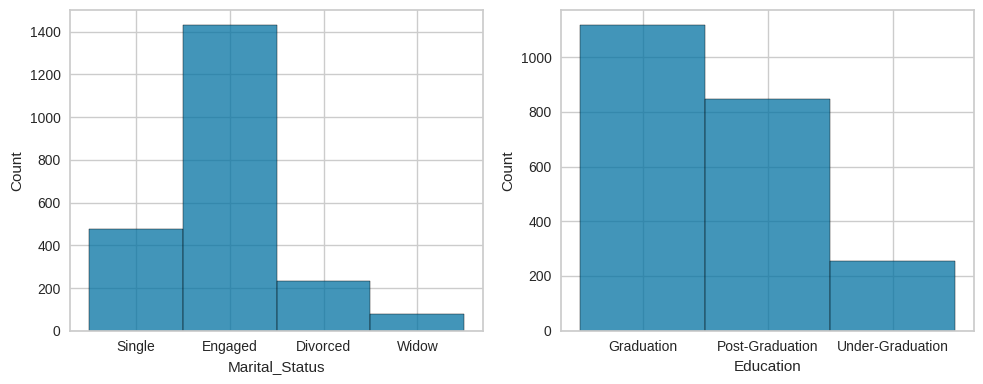

In [277]:
#Visualización
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

sns.histplot(df_train['Marital_Status'],ax=axes[0])
sns.histplot(df_train['Education'],ax=axes[1])

plt.tight_layout()
plt.show()

**Observaciones:**

- Marital_Status: se puede ver que Engaged es la categoría que más presencia tiene en comparación a Single, Divorced y Widow que siguen ese orden respectivamente.

- Education: puede verse que la frecuencia para las categorías de esta columna sigue el siguiente orden: Graduation, Post-Graduation y Under-Graduation.

Revisión de columnas numéricas

In [278]:
# Verificar valores únicos de las columnas
unique_values = {col: df_train[col].unique() for col in df_train.columns}

# Mostrar los valores únicos
for col, values in unique_values.items():
    print(f"Columna {col}:")
    print(values)
    print()


Columna ID:
[5524 2174 4141 ... 7270 8235 9405]

Columna Year_Birth:
[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1976 1959 1952 1987
 1946 1980 1949 1982 1979 1951 1969 1989 1963 1970 1973 1943 1975 1996
 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1983 1945 1991
 1962 1953 1956 1992 1961 1900 1986 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]

Columna Education:
['Graduation' 'Post-Graduation' 'Under-Graduation']

Columna Marital_Status:
['Single' 'Engaged' 'Divorced' 'Widow']

Columna Income:
[58138. 46344. 71613. ... 56981. 69245. 52869.]

Columna Kidhome:
[0 1 2]

Columna Teenhome:
[0 1 2]

Columna Dt_Customer:
['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '31-05-2013'
 '22-11-2013' '22-05-20

**Observaciones:**

- Se podría generar una columna de edades teniendo en cuenta el año actual con diferencia de la columna Year_Birth.

Se encontraron similitudes en las siguientes columnas y por ende podrían agruparse:

- Las columnas Kidhome y Teenhome.

- Las columnas MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds.

- Las columnas NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases.

- Las columnas AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2.


**Featuring Engineering y Visualizaciones de las columnas numéricas**

Crear columna Age

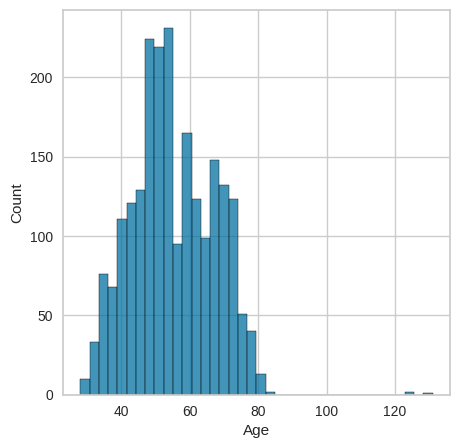

In [279]:
df_train['Age'] = 2024-df_train['Year_Birth']
plt.figure(figsize=(5,5))
sns.histplot(df_train['Age'])
plt.show()

**Observaciones:** Se puede ver que el rango de edades se comprende entre aproximadamente 40 a 80 años de edad. Sin embargo, puede notarse que existen edades después de los 120 años, lo cual es poco probable, por ende, se descartarán.

In [280]:
df_train = df_train[df_train['Age'] <= 120]	#Se opta por 120 para evaluar los posibles valores que podrían haber.
df_train['Age']

,Age
0,67
1,70
2,59
3,40
4,43
...,...
2235,57
2236,78
2237,43
2238,68


In [281]:
# Verificar los cambios
print(df_train['Age'].max())  # El valor 84 no es tan distante a los valores con los que se cuentan, por lo que se deja.


84


Crear columna Total_children

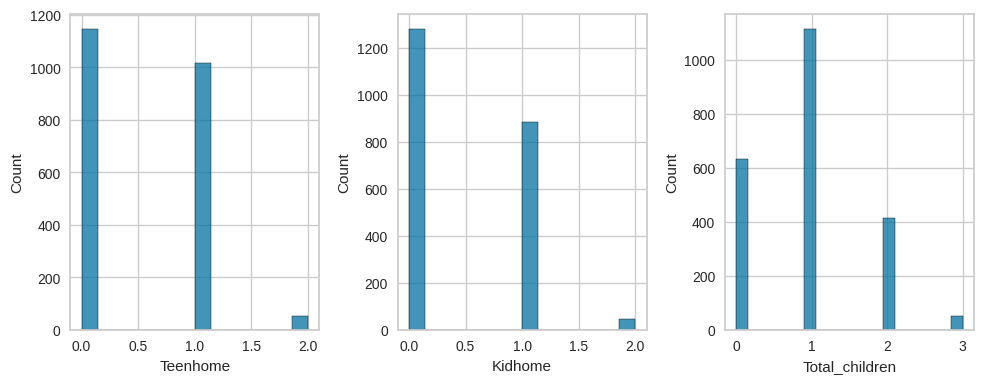

In [282]:
df_train['Total_children'] = df_train['Teenhome']+df_train['Kidhome']

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10,4))

sns.histplot(df_train['Teenhome'],ax=axes[0])
sns.histplot(df_train['Kidhome'],ax=axes[1])
sns.histplot(df_train['Total_children'],ax=axes[2])
plt.tight_layout()
plt.show()

Crear columna Total_Expenses

In [283]:
#MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds
df_train['Total_Expenses'] = df_train['MntWines'] + df_train['MntFruits'] + df_train['MntMeatProducts'] + df_train['MntFishProducts'] + df_train['MntSweetProducts'] + df_train['MntGoldProds']


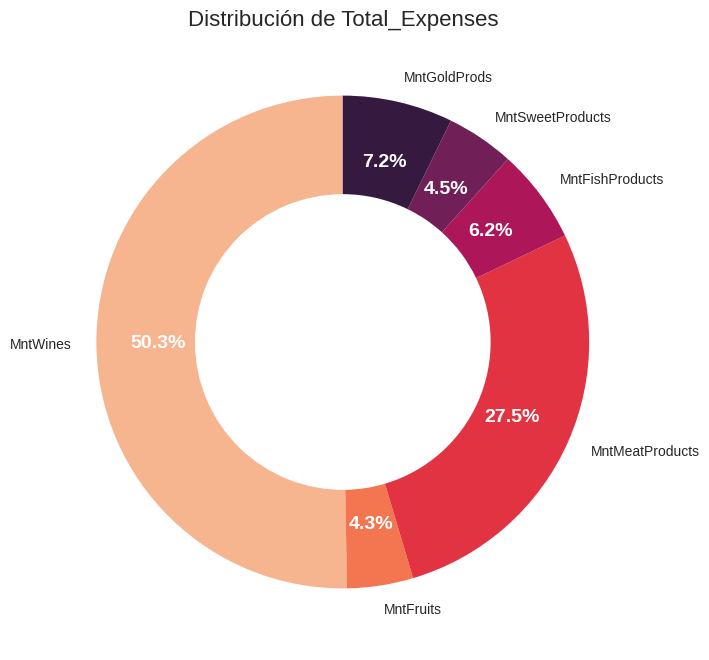

In [284]:
Total_Expenses = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spend = df_train[Total_Expenses].sum()


colors = sns.color_palette("rocket_r", len(Total_Expenses))
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(total_spend, labels=Total_Expenses, autopct='%1.1f%%',
                                   startangle=90, colors=colors, wedgeprops=dict(width=0.4), pctdistance=0.75)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_weight('bold')

# Add title
plt.title('Distribución de Total_Expenses', fontsize=16)

plt.show()

Observaciones: Este gráfico de anillo muestra la distribución porcentual de Total_Expenses (Gastos Totales) entre diferentes categorías de productos. La distribución se divide en seis categorías principales:

- MntWines (Vinos): Representa el mayor gasto con un 50.3% del total, lo que indica que los vinos constituyen más de la mitad de los gastos.

- MntMeatProducts (Productos Cárnicos): Es el segundo mayor gasto con un 27.5% del total.

- MntGoldProds (Productos Gold): Representa un 7.2% de los gastos totales.

- MntFishProducts (Productos de Pescado): Constituye un 6.2% del total de gastos.

- MntSweetProducts (Productos Dulces): Representa un 4.5% de los gastos.

- MntFruits (Frutas): Es la categoría con menor gasto, representando solo un 4.3% del total.



Crear columna Total_Purchases

In [285]:
#NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases
df_train['Total_Purchases'] = df_train['NumWebPurchases'] + df_train['NumCatalogPurchases'] + df_train['NumStorePurchases'] + df_train['NumDealsPurchases']

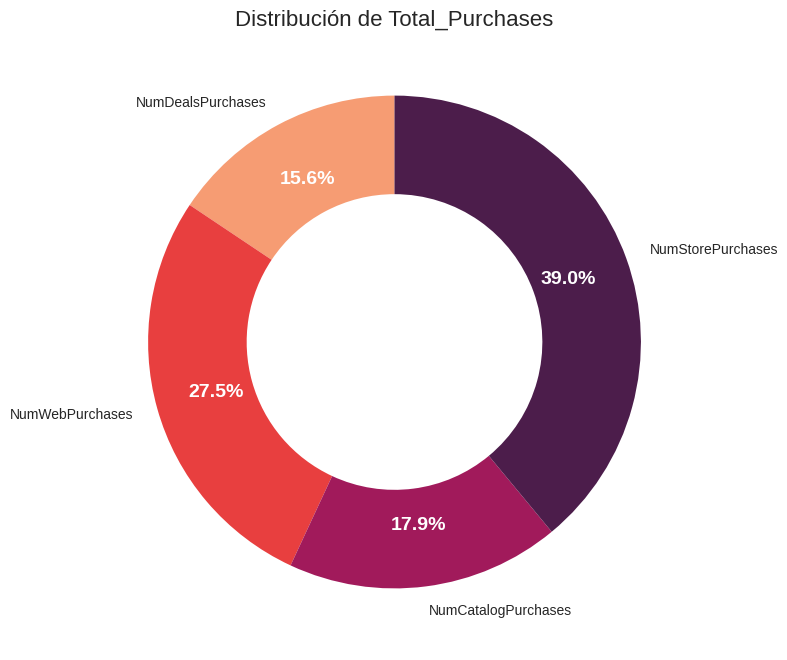

In [286]:
Total_Purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
total_purch = df_train[Total_Purchases].sum()


colors = sns.color_palette("rocket_r", len(Total_Purchases))
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(total_purch, labels=Total_Purchases, autopct='%1.1f%%',
                                   startangle=90, colors=colors, wedgeprops=dict(width=0.4), pctdistance=0.75)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_weight('bold')

# Add title
plt.title('Distribución de Total_Purchases', fontsize=16)

plt.show()

Observaciones: Este gráfico de anillo muestra la distribución porcentual de Total_Purchases (Compras Totales) entre diferentes categorías de productos. La distribución se divide en cuatro categorías principales:

- NumStorePurchases (Compras en Tienda): Representa el mayor porcentaje de compras con un 39.0% del total. Esto indica que se realizaron más compras en tiendas en comparación al resto.

- NumWebPurchases (Compras Web): Es la segunda mayor compra con un 27.5% del total.

- NumCatalogPurchases (Compras por Catálogo): Representa un 17.9% de los gastos totales.

- NumDealsPurchases (Compras por Acuerdo): Es la categoría con menor gasto, representando un 15.6% del total.



Crear columna Total_AcceptedCmp

In [287]:
#AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2
df_train['Total_AcceptedCmp'] = df_train['AcceptedCmp1'] + df_train['AcceptedCmp2'] + df_train['AcceptedCmp3'] + df_train['AcceptedCmp4'] + df_train['AcceptedCmp5']


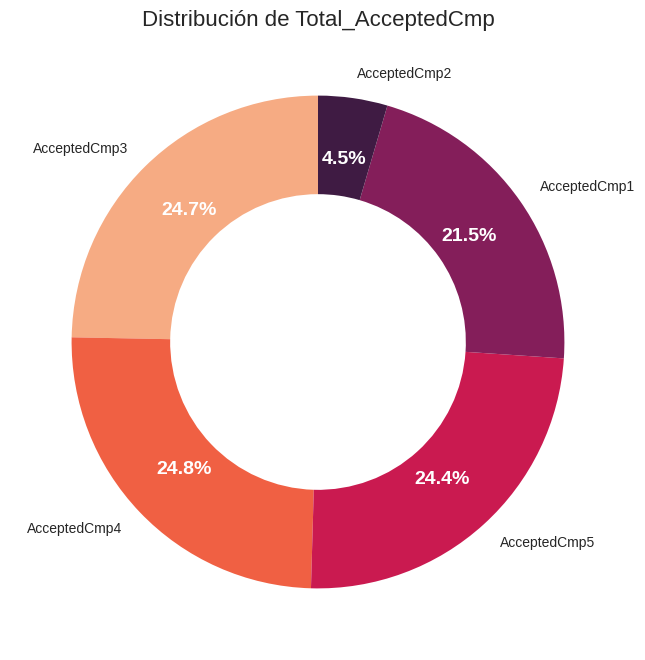

In [288]:
Total_AcceptedCmp = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']
total_accepted = df_train[Total_AcceptedCmp].sum()


colors = sns.color_palette("rocket_r", len(Total_AcceptedCmp))
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(total_accepted, labels=Total_AcceptedCmp, autopct='%1.1f%%',
                                   startangle=90, colors=colors, wedgeprops=dict(width=0.4), pctdistance=0.75)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_weight('bold')

# Add title
plt.title('Distribución de Total_AcceptedCmp', fontsize=16)

plt.show()

Observaciones: Este gráfico de anillo muestra la distribución porcentual de Total_AcceptedCmp (Campañas Aceptadas) entre diferentes categorías de productos. La distribución se divide en cinco categorías principales:

- AcceptedCmp4: Representa el mayor porcentaje (ligeramente), con un 24.8% del total, lo cual indica gran aceptación o demanda de la campaña.

- AcceptedCmp3: Es la segunda mayor campaña (ligeramente) con un 24.7% del total.

- AcceptedCmp5: Representa un 24.4% del nivel de popularidad de la campaña con respecto al resto.

Se podría decir que las campañas 4, 3 y 5 debido a sus ligeras diferencias son casi iguales, esto demuestra igual nivel de éxito.

- AcceptedCmp1: Representa 21.5% del total, esto refleja gran aceptación de esta campaña.

- AcceptedCmp2: Es la campaña con menor porcentaje, con 4.5%, lo que indica menor éxito o popularidad de la misma en relación al resto.



Visualizaciones Multivariadas

In [289]:
#Functión para crear gráfico de barras
def stackbar(data):
    categories = data.index
    values = data.values
    columns=data.columns

    fig, ax = plt.subplots(figsize=(8,6))
    cum_sum=np.zeros(len(categories))

    for i,columns in enumerate(columns):
        plot = ax.bar(categories, values[:,i],bottom=cum_sum,label=columns)
        cum_sum+=values[:,i]
    return (plot)

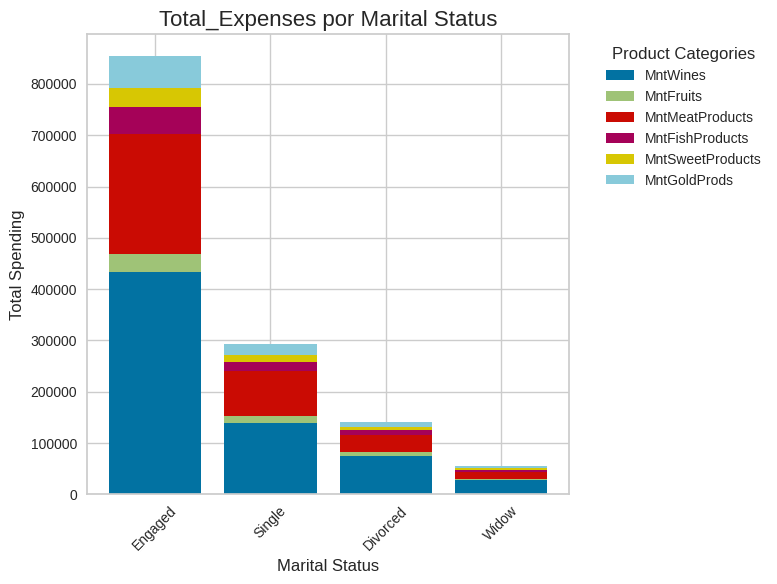

In [290]:
group1 = df_train.groupby('Marital_Status').agg({'MntWines':'sum', 'MntFruits':'sum',
       'MntMeatProducts':'sum', 'MntFishProducts':'sum', 'MntSweetProducts':'sum',
       'MntGoldProds':'sum'}).sort_values(by='MntWines',ascending=False)

stackbar(group1)
# Add labels, title, and legend
plt.title('Total_Expenses por Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observaciones: se puede ver que el gráfico compara los diferentes gastos en productos por el tipo de estado sentimental. En los cuatro grupos existentes: Engage, Single, Divorced y Widow se puede ver que predomina un patrón de gasto, el cual sigue el siguiente orden aproximadamente: MntWines, MntMeatProducts, MntGoldProds, MntFish Products, MntSweetProducts y MntFruits.

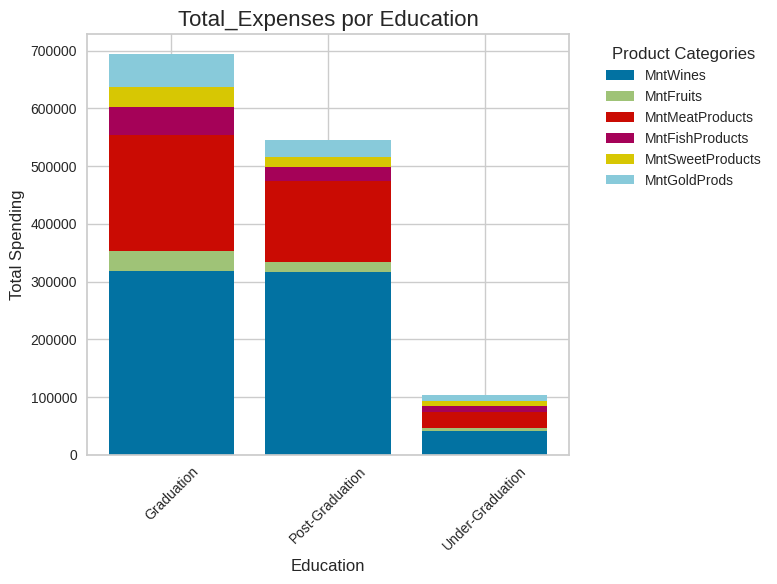

In [291]:
group2 = df_train.groupby('Education').agg({'MntWines':'sum', 'MntFruits':'sum','MntMeatProducts':'sum', 'MntFishProducts':'sum', 'MntSweetProducts':'sum',
       'MntGoldProds':'sum'}).sort_values(by='MntWines',ascending=False)

stackbar(group2)
# Add labels, title, and legend
plt.title('Total_Expenses por Education', fontsize=16)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observaciones: este gráfico sigue el mismo principio que el anterior con el fin de demostrar el porcentaje de gasto por tipo de education. El ranking se distribuye como sigue: Graduation siendo el más grande, seguido por Post-Graduation y por último, Under-Graduation. Sigue aproximadamente el siguiente tipo de distribución en sus tres grupos: MntWines, MntMeatProducts, MntGoldProds, MntFishProducts, MntSweetProducts y por último MntFruits.

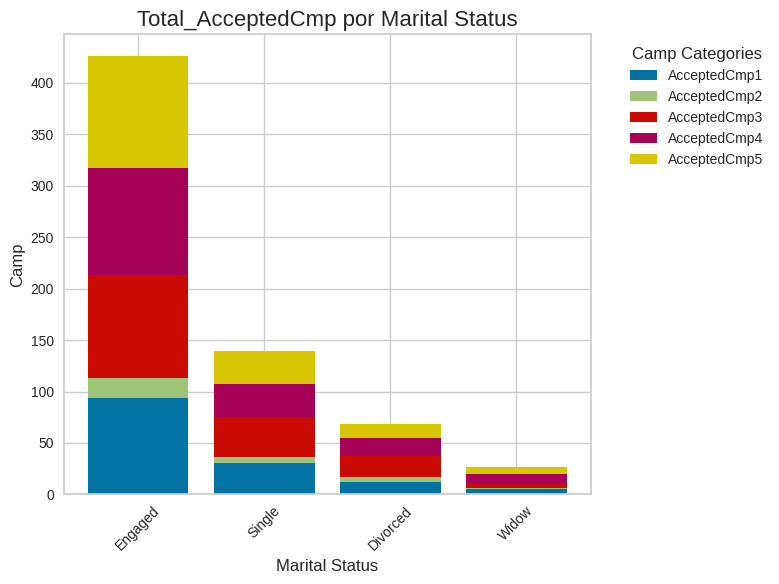

In [292]:
group3 = df_train.groupby(['Marital_Status']).agg({'AcceptedCmp1':'sum','AcceptedCmp2':'sum','AcceptedCmp3':'sum','AcceptedCmp4': 'sum',
    'AcceptedCmp5':'sum', }).sort_values(by='AcceptedCmp1',ascending=False)


stackbar(group3)
# Add labels, title, and legend
plt.title('Total_AcceptedCmp por Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Camp', fontsize=12)
plt.legend(title='Camp Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observaciones: en este gráfico se compara las campañas (Camp) por el tipo de compromiso. Se puede notar que de mayor a menor este sería el orden: Engaged, Single, Divorced, Widow. Las campañas aproximadamente siguen el siguiente orden: Cmp5, Cmp4 y Cmp3 liderando, seguidos por Cmp1 y Cmp2 en ese respectivo orden.

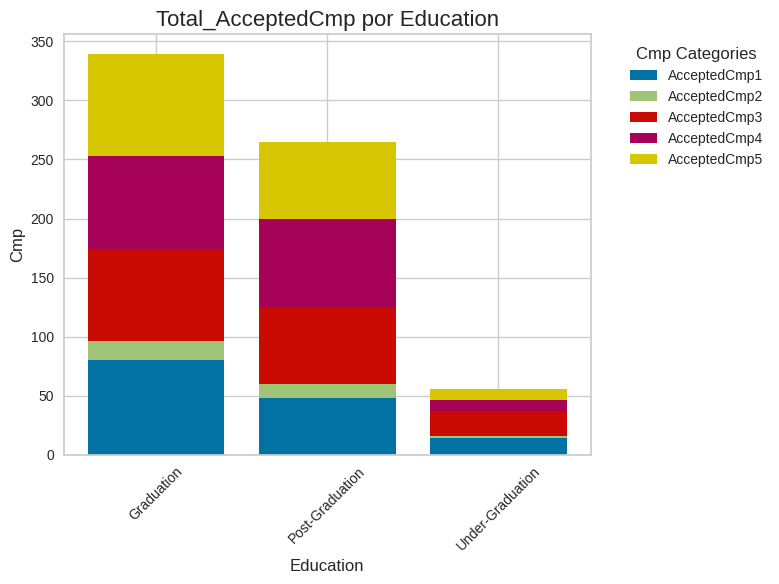

In [293]:
group4 = df_train.groupby(['Education']).agg({'AcceptedCmp1':'sum','AcceptedCmp2':'sum','AcceptedCmp3':'sum','AcceptedCmp4': 'sum',
    'AcceptedCmp5':'sum',}).sort_values(by='AcceptedCmp1',ascending=False)

stackbar(group4)
# Add labels, title, and legend
plt.title('Total_AcceptedCmp por Education', fontsize=16)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Cmp', fontsize=12)
plt.legend(title='Cmp Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observaciones: se puede ver que el ranking de education sigue el orden: Graduation, Post-Graduation y Under-Graduation respectivamente. Siendo las campañas más aceptadas las Cmp5, Cmp4 y Cmp3, para luego seguir por la Cmp1 y concluir con la Cmp2.

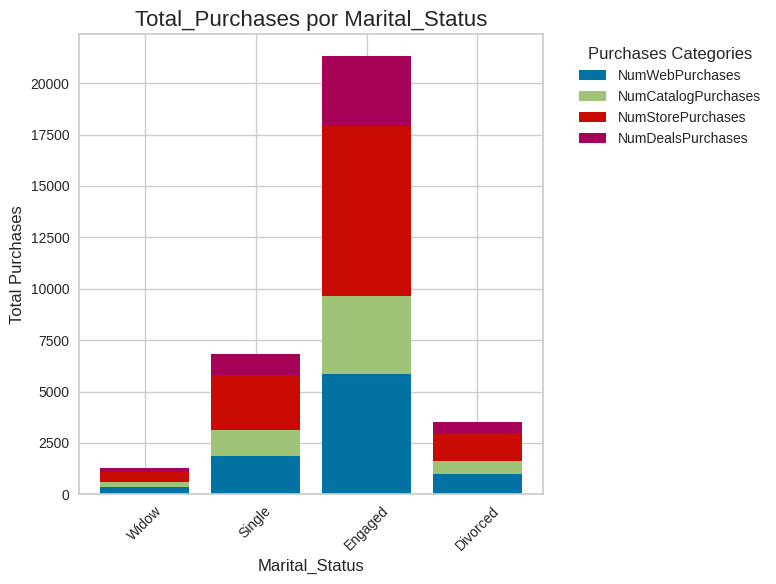

In [294]:
group5 = df_train.groupby(['Marital_Status']).agg({'NumWebPurchases':'sum','NumCatalogPurchases':'sum','NumStorePurchases': 'sum', 'NumDealsPurchases':'sum',
}).sort_values(by='Marital_Status', ascending=False)

stackbar(group5)
# Add labels, title, and legend
plt.title('Total_Purchases por Marital_Status', fontsize=16)
plt.xlabel('Marital_Status', fontsize=12)
plt.ylabel('Total Purchases', fontsize=12)
plt.legend(title='Purchases Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observaciones: en esta comparación de compras por tipo de estado sentimental se puede percibir lo siguiente: Engaged es el grupo con más frecuencia de compras, seguido de Single, Divorced y Widow respectivamente. Se distribuyen de la siguiente manera: Compras por Tienda (mayor porcentaje), compras Web (segundo mayor), compras por Catálogo y por último compras por acuerdo.

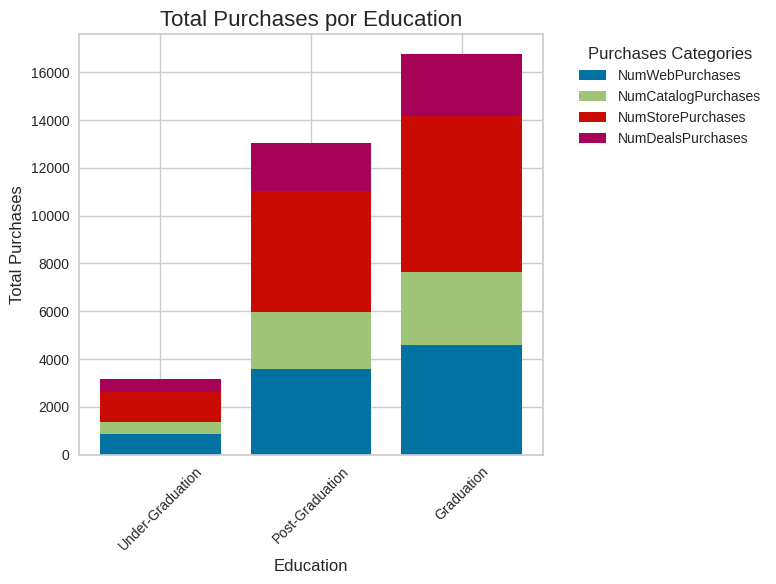

In [295]:
group6 = df_train.groupby(['Education']).agg({'NumWebPurchases':'sum','NumCatalogPurchases':'sum','NumStorePurchases': 'sum', 'NumDealsPurchases':'sum',
}).sort_values(by='Education',ascending=False)

stackbar(group6)
# Add labels, title, and legend
plt.title('Total Purchases por Education', fontsize=16)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Total Purchases', fontsize=12)
plt.legend(title='Purchases Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observaciones: Se observa que el orden de compras es el siguiente: compras por tienda, compras por web, compras por catálogo y por último, compras por acuerdo. El orden por educación es: Graduation como el mayor, Post-Graduation como segundo y Under-Graduation por último.

Ajuste de Formatos y Outliers

In [296]:
df_train.info() #Se puede ver que sólo hay tres columnas tipo object

<class 'pandas.core.frame.DataFrame'>
Index: 2213 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2213 non-null   int64  
 1   Year_Birth           2213 non-null   int64  
 2   Education            2213 non-null   object 
 3   Marital_Status       2213 non-null   object 
 4   Income               2213 non-null   float64
 5   Kidhome              2213 non-null   int64  
 6   Teenhome             2213 non-null   int64  
 7   Dt_Customer          2213 non-null   object 
 8   Recency              2213 non-null   int64  
 9   MntWines             2213 non-null   int64  
 10  MntFruits            2213 non-null   int64  
 11  MntMeatProducts      2213 non-null   int64  
 12  MntFishProducts      2213 non-null   int64  
 13  MntSweetProducts     2213 non-null   int64  
 14  MntGoldProds         2213 non-null   int64  
 15  NumDealsPurchases    2213 non-null   int64 

In [297]:
df_train['Dt_Customer'] = pd.to_datetime(df_train.Dt_Customer, format="%d-%m-%Y")

In [298]:
# Seleccionar las columnas necesarias

df_1 = df_train[['Education', 'Marital_Status', 'Income', 'Age', 'Total_children', 'Total_Expenses', 'Recency', 'Total_Purchases',
         'Total_AcceptedCmp', 'Complain', 'Response']]

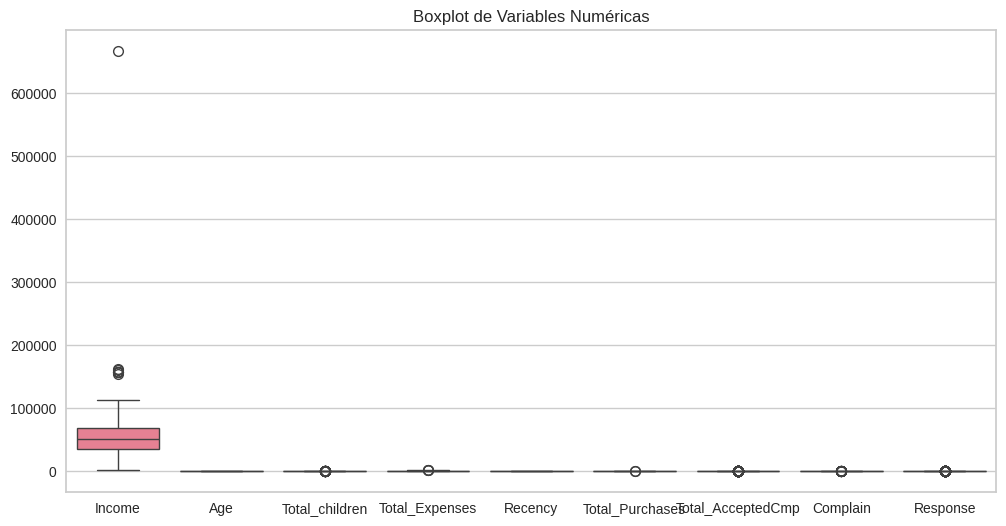

In [299]:
# Identificación y manejo de outliers con boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_1.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot de Variables Numéricas')
plt.show()

In [300]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2213 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2213 non-null   object 
 1   Marital_Status     2213 non-null   object 
 2   Income             2213 non-null   float64
 3   Age                2213 non-null   int64  
 4   Total_children     2213 non-null   int64  
 5   Total_Expenses     2213 non-null   int64  
 6   Recency            2213 non-null   int64  
 7   Total_Purchases    2213 non-null   int64  
 8   Total_AcceptedCmp  2213 non-null   int64  
 9   Complain           2213 non-null   int64  
 10  Response           2213 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 207.5+ KB


Observaciones: Se puede ver que sólo la columna Income posee outliers. Se procederá a revisarlos.

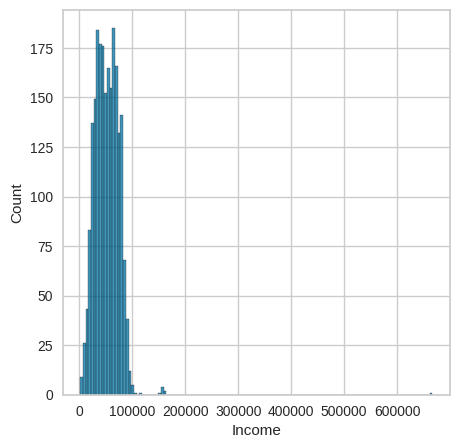

In [301]:
#Visualizar por histogramas
plt.figure(figsize=(5,5))
sns.histplot(df_train['Income'])
plt.show()

Consideración: debido a que es una columna que representa valores de ingresos, si bien, en el muestreo de datos se podrían tener valores que excedan lo normal, se procederá igual a tratarlos posteriormente. Se imputará la moda debido a que se considera que va a reducir un poco la variabilidad excesiva. Para este caso en particular, se puede ver que desde 200000 hasta 600000 no hay valores, lo cual es una cantidad bastante considerable

In [302]:
df_1.describe()

,Income,Age,Total_children,Total_Expenses,Recency,Total_Purchases,Total_AcceptedCmp,Complain,Response
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
mean,52236.581563,55.082693,0.947582,607.021690,49.007682,14.889742,0.298238,0.009038,0.150474
std,25178.603047,11.700216,0.749297,602.488663,28.941864,7.670341,0.679446,0.094657,0.357617
min,1730.000000,28.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35246.000000,47.000000,0.000000,69.000000,24.000000,8.000000,0.000000,0.000000,0.000000
50%,51373.000000,54.000000,1.000000,397.000000,49.000000,15.000000,0.000000,0.000000,0.000000
75%,68487.000000,65.000000,1.000000,1048.000000,74.000000,21.000000,0.000000,0.000000,0.000000
max,666666.000000,84.000000,3.000000,2525.000000,99.000000,44.000000,4.000000,1.000000,1.000000


In [303]:
#Descripción de las columnas object
df_1.describe(include='object')

,Education,Marital_Status
count,2213,2213
unique,3,4
top,Graduation,Engaged
freq,1116,1429


In [304]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2213 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2213 non-null   object 
 1   Marital_Status     2213 non-null   object 
 2   Income             2213 non-null   float64
 3   Age                2213 non-null   int64  
 4   Total_children     2213 non-null   int64  
 5   Total_Expenses     2213 non-null   int64  
 6   Recency            2213 non-null   int64  
 7   Total_Purchases    2213 non-null   int64  
 8   Total_AcceptedCmp  2213 non-null   int64  
 9   Complain           2213 non-null   int64  
 10  Response           2213 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 207.5+ KB


        ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233  9432        1977  Graduation        Engaged  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  \
2233         0  2013-06-02       23         9  ...             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  Total_children  \
2233             0             0         0         0   47               1   

      Total_Expenses  Total_Purchases  Total_AcceptedCmp  
2233              62               11                  0  

[1 rows x 32 columns]


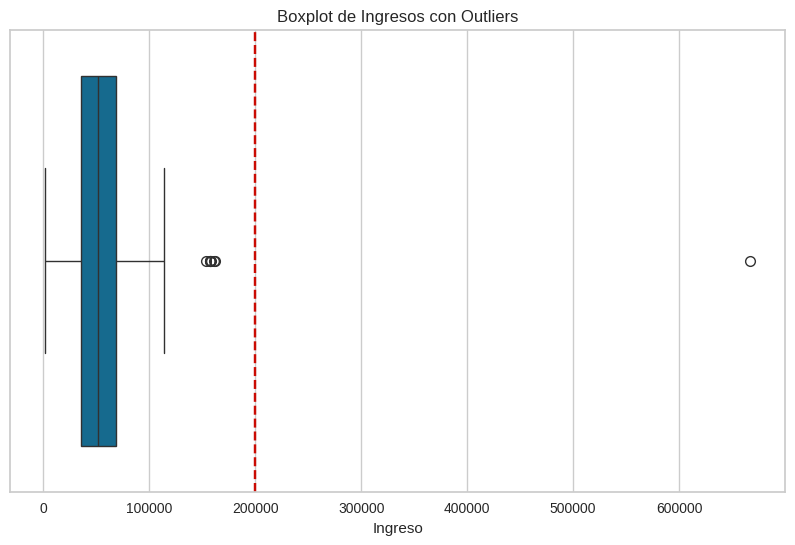

In [305]:
# Filtrar los outliers
outliers = df_train[df_train['Income'] > 200000]

# Mostrar los outliers
print(outliers)

# Crear el boxplot para visualizar los outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['Income'])
plt.axvline(200000, color='r', linestyle='--')  # Línea roja para marcar el umbral de 200000
plt.title('Boxplot de Ingresos con Outliers')
plt.xlabel('Ingreso')
plt.show()


Observaciones: como es sólo uno el outlier, se procederá a eliminarlo del dataset.

In [306]:
# Filtrar el DataFrame para eliminar filas donde el 'Income' es mayor a 200,000
df_train = df_train[df_train['Income'] <= 200000]

# Verificar los cambios
print(f"El número de filas después de eliminar outliers: {df_train.shape[0]}")
print(f"Máximo valor en 'Income' después de eliminar outliers: {df_train['Income'].max()}")


El número de filas después de eliminar outliers: 2212
Máximo valor en 'Income' después de eliminar outliers: 162397.0


In [307]:
# Seleccionar las columnas necesarias

df_1 = df_train[['Education', 'Marital_Status', 'Income', 'Age', 'Total_children', 'Total_Expenses', 'Recency', 'Total_Purchases',
         'Total_AcceptedCmp', 'Complain', 'Response']]

In [308]:
df_1.describe()

,Income,Age,Total_children,Total_Expenses,Recency,Total_Purchases,Total_AcceptedCmp,Complain,Response
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,55.086347,0.947559,607.268083,49.019439,14.891501,0.298373,0.009042,0.150542
std,21527.278844,11.701599,0.749466,602.513364,28.943121,7.671629,0.679570,0.094678,0.357683
min,1730.000000,28.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35233.500000,47.000000,0.000000,69.000000,24.000000,8.000000,0.000000,0.000000,0.000000
50%,51371.000000,54.000000,1.000000,397.000000,49.000000,15.000000,0.000000,0.000000,0.000000
75%,68487.000000,65.000000,1.000000,1048.000000,74.000000,21.000000,0.000000,0.000000,0.000000
max,162397.000000,84.000000,3.000000,2525.000000,99.000000,44.000000,4.000000,1.000000,1.000000


## 2. Análisis no supervisado:
Se escoje el método K-means

In [309]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer #pip install yellowbrick
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [310]:
# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_1.select_dtypes(include=[np.number]))

# Convertir a DataFrame para facilitar el uso de pandas
df_scaled = pd.DataFrame(df_scaled, columns=df_1.select_dtypes(include=[np.number]).columns)


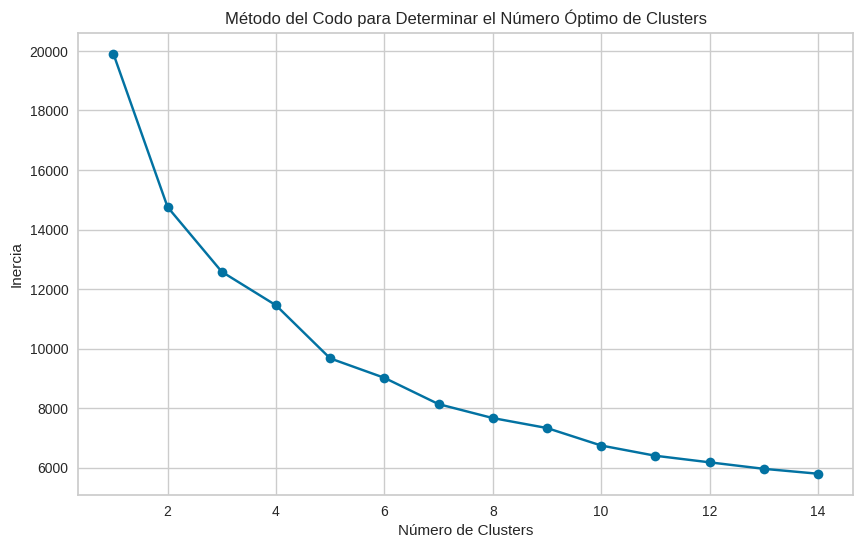

In [311]:
# Determinar el número óptimo de clusters usando el método del codo
sse = []
k_range = range(1, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.show()


Observaciones:

Elementos del gráfico:

- Eje X: Representa el número de clusters (desde 1 hasta 14)
- Eje Y: Representa la inercia (suma de las distancias al cuadrado de cada punto a su centroide más cercano)
- La línea azul: Muestra cómo va disminuyendo la inercia conforme aumenta el número de clusters

Análisis del gráfico:

Se observa una disminución pronunciada de la inercia desde 1 hasta aproximadamente 4-5 clusters.
Después de este punto, la disminución es más gradual y la línea comienza a "aplanarse".
El "codo" de la curva (el punto donde la disminución de la inercia comienza a estabilizarse) parece estar alrededor de 4-5 clusters.

Interpretación:

El punto del "codo" suele considerarse como el número óptimo de clusters, ya que después de este punto, agregar más clusters no proporciona una mejora significativa en la explicación de la varianza de los datos.
En este caso, basándonos en el gráfico, se podría sugerir que el número óptimo de clusters está entre 4 y 5, ya que:

Antes de este punto, cada cluster adicional reduce significativamente la inercia
Después de este punto, la reducción en la inercia es menos pronunciada, indicando que agregar más clusters no aporta tanto valor al modelo.

In [312]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Aplicar K-means con el número óptimo de clusters (supongamos k=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_1['Cluster'] = kmeans.fit_predict(df_scaled)

# Calcular el silhouette score
silhouette_avg = silhouette_score(df_scaled, df_1['Cluster'])
print(f"Silhouette Score para k={optimal_k}: {silhouette_avg}")


Silhouette Score para k=5: 0.20867738138150427


<ipython-input-312-78888bf0070e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Cluster'] = kmeans.fit_predict(df_scaled)


Interpretación del Resultado: 0.14483833181717512:

Positivo pero Bajo: El valor de 0.1448 es positivo, lo cual es bueno, pero es relativamente bajo. Esto sugiere que los clusters están algo definidos, pero no de manera fuerte. Los objetos dentro de los clusters no están muy cohesionados y hay cierta superposición entre los clusters.

Posible Mejoramiento: Un silhouette score bajo puede indicar que: El número de clusters elegido (k=5) puede no ser el óptimo.

- Las características utilizadas para el clustering pueden no estar separando bien los grupos.

- Tal vez se necesite escalar o transformar los datos de otra manera.

Se procederá a evaluar con diferentes clusters: 2,3,4.

Para k=2 ofrece un mejor resultado: 0.216 que k=3:0.198 o k=4:0.209, por ende, se trabajará con k=2.

In [313]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Aplicar K-means con el número óptimo de clusters (supongamos k=2)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_1['Cluster'] = kmeans.fit_predict(df_scaled)

# Calcular el silhouette score
silhouette_avg = silhouette_score(df_scaled, df_1['Cluster'])
print(f"Silhouette Score para k={optimal_k}: {silhouette_avg}")


<ipython-input-313-90c8bbc2396e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Cluster'] = kmeans.fit_predict(df_scaled)


Silhouette Score para k=2: 0.2688926319914447


Observaciones:

- Silhouette Score: 0.216: El silhouette score indica que los clusters están mejor definidos con k=2 en comparación con k=3 o k=4. Aunque todavía es relativamente bajo, sugiere que los clientes se agrupan de manera más coherente en dos grandes clusters.

- Visualización de Clusters: La visualización del scatterplot permite observar cómo se dividen los clientes en dos clusters basándose en características como Ingresos y Edad. Esto proporciona una idea visual de la agrupación. La cual se puede ver a continuación. No parece agrupar muy bien.

- Características de los Clusters: Analizar las medias de las características por cluster permite entender las diferencias entre los dos grupos. Por ejemplo, podrías encontrar que un cluster representa clientes con mayores ingresos y menor edad, mientras que el otro representa clientes con ingresos más bajos y mayor edad.

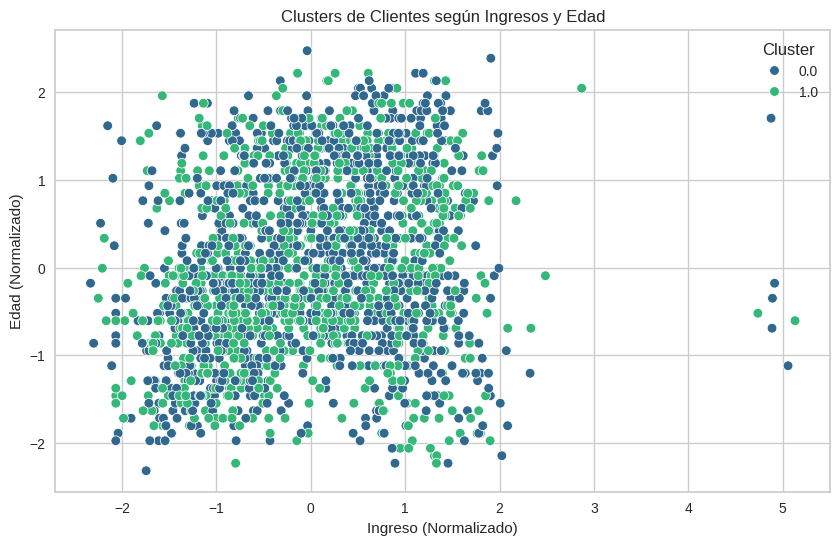

In [314]:
# Visualizar los clusters usando un par de características
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled['Income'], y=df_scaled['Age'], hue=df_1['Cluster'], palette='viridis')
plt.title('Clusters de Clientes según Ingresos y Edad')
plt.xlabel('Ingreso (Normalizado)')
plt.ylabel('Edad (Normalizado)')
plt.show()


Observaciones: La distribución de los datos sugieren una densidad bastante importante con algunos valores atípicos (outliers) hacia los extremos.

Debido a que no se utilizaron las variables tipo object, se procede a utilizar LabelEncoder para ver si mejora la clusterización.

In [315]:
# Inicializar LabelEncoder
le = LabelEncoder()

# Identificar las columnas categóricas
categorical_columns = df_1.select_dtypes(include=['object']).columns

# Convertir las columnas categóricas a numéricas
for col in categorical_columns:
    df_1[col] = le.fit_transform(df_1[col])

# Verificar la conversión
print(df_1.head())


   Education  Marital_Status   Income  Age  Total_children  Total_Expenses  \
0          0               2  58138.0   67               0            1617   
1          0               2  46344.0   70               2              27   
2          0               1  71613.0   59               0             776   
3          0               1  26646.0   40               1              53   
4          1               1  58293.0   43               1             422   

   Recency  Total_Purchases  Total_AcceptedCmp  Complain  Response  Cluster  
0       58               25                  0         0         1        1  
1       38                6                  0         0         0        0  
2       26               21                  0         0         0        1  
3       26                8                  0         0         0        0  
4       94               19                  0         0         0        0  


<ipython-input-315-d96a71ef1669>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col] = le.fit_transform(df_1[col])
<ipython-input-315-d96a71ef1669>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col] = le.fit_transform(df_1[col])


In [316]:
# Normalizar los datos
scaler = StandardScaler()
df_scaled_1 = scaler.fit_transform(df_1)

# Convertir a DataFrame para facilitar el uso de pandas
df_scaled_1 = pd.DataFrame(df_scaled_1, columns=df_1.columns)


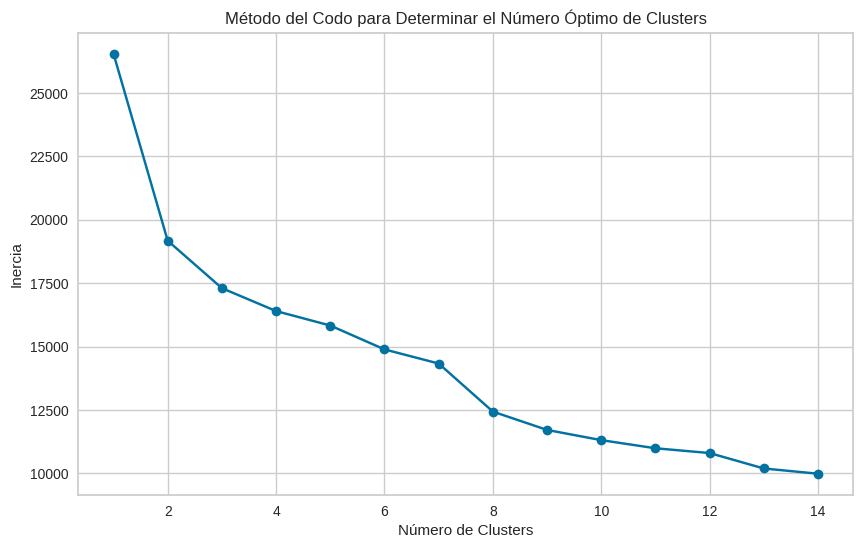

In [317]:
# Determinar el número óptimo de clusters usando el método del codo
sse = []
k_range = range(1, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled_1)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.show()


La interpretación sugiere que:

- Sigue una tendencia parecida al gráfico anterior.

- El número óptimo de clusters para este conjunto de datos estaría entre 4 y 5.


In [318]:
# Aplicar K-means con el número óptimo de clusters (k=2)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_1['Cluster'] = kmeans.fit_predict(df_scaled_1)

# Calcular el silhouette score
silhouette_avg = silhouette_score(df_scaled_1, df_1['Cluster'])
print(f"Silhouette Score para k={optimal_k}: {silhouette_avg}")


Silhouette Score para k=2: 0.28079210778988173


<ipython-input-318-3566f1f1e415>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Cluster'] = kmeans.fit_predict(df_scaled_1)


Observaciones: El resultado sugiere una mejoría en el score. Este resultado sugiere que dos clusters proporcionan una mejor estructura que tres o cuatro clusters en este conjunto de datos.

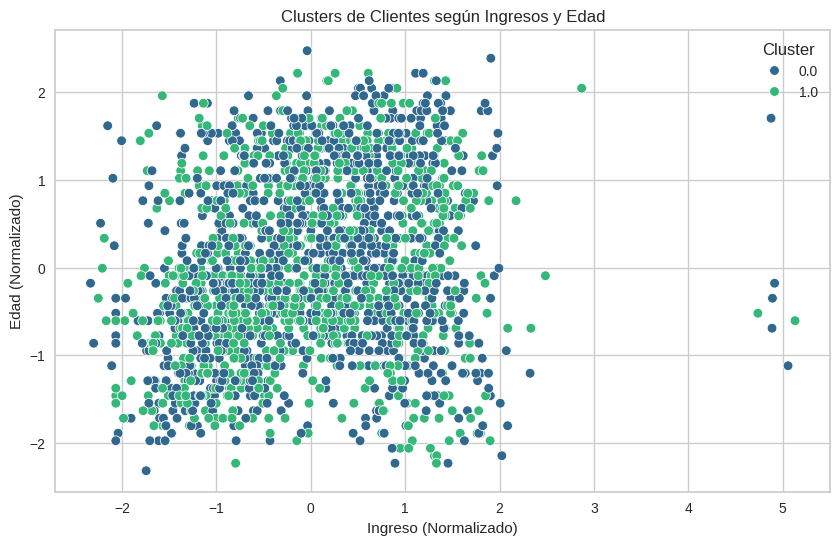

In [319]:
# Visualizar los clusters usando un par de características
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled_1['Income'], y=df_scaled_1['Age'], hue=df_1['Cluster'], palette='viridis')
plt.title('Clusters de Clientes según Ingresos y Edad')
plt.xlabel('Ingreso (Normalizado)')
plt.ylabel('Edad (Normalizado)')
plt.show()


No se observa alguna mejoría notable en comparación con el gráfico anterior.

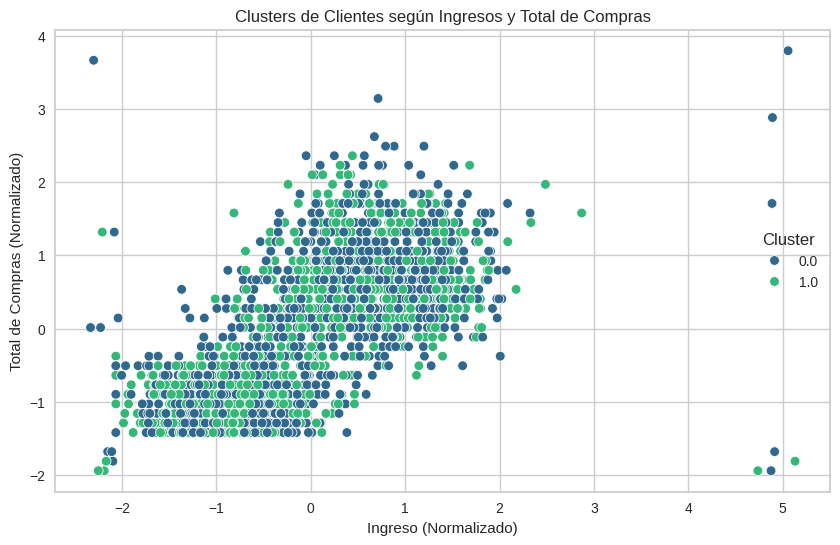

In [320]:
# Visualizar los clusters usando un par de características, por ejemplo, Ingresos y Total de Compras
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled_1['Income'], y=df_scaled_1['Total_Purchases'], hue=df_1['Cluster'], palette='viridis')
plt.title('Clusters de Clientes según Ingresos y Total de Compras')
plt.xlabel('Ingreso (Normalizado)')
plt.ylabel('Total de Compras (Normalizado)')
plt.show()


Observaciones: Se pueden visualizar los puntos pero no una separación notable por clusters.

In [321]:
# Calcular las medias de las características demográficas por cluster
demographic_columns = ['Education', 'Marital_Status', 'Age', 'Total_children']
cluster_means_demographics = df_1.groupby('Cluster')[demographic_columns].mean()
print(cluster_means_demographics)

# Calcular las medias de las características de compras por cluster
purchase_columns = ['Income', 'Total_Expenses', 'Recency', 'Total_Purchases', 'Total_AcceptedCmp', 'Complain', 'Response']
cluster_means_purchases = df_1.groupby('Cluster')[purchase_columns].mean()
print(cluster_means_purchases)


         Education  Marital_Status        Age  Total_children
Cluster                                                      
0         0.643791        1.172386  53.242647        1.245098
1         0.567814        1.189271  57.370445        0.578947
               Income  Total_Expenses    Recency  Total_Purchases  \
Cluster                                                             
0        36896.829248      149.749183  48.817810         9.470588   
1        70618.593117     1174.072874  49.269231        21.607287   

         Total_AcceptedCmp  Complain  Response  
Cluster                                         
0                 0.081699  0.010621  0.089052  
1                 0.566802  0.007085  0.226721  


Análisis de Clusters Demográficos:

Cluster 0:

- Educación: Este grupo tiene un nivel educativo más alto.

- Edad: Los miembros de este grupo son relativamente más jóvenes.

- Hijos: Tienen más hijos en promedio.

- Estado Civil: Similar al Cluster 1.

Cluster 1:

- Educación: Este grupo tiene un nivel educativo ligeramente menor.

- Edad: Los miembros de este grupo son relativamente más viejos.

- Hijos: Tienen menos hijos en promedio.

* Estado Civil: Similar al Cluster 0.

Análisis de Clusters por compras:

Cluster 0:

- Ingreso: Este grupo tiene ingresos más bajos.

- Gastos Totales: Gastan significativamente menos.

- Recencia: La diferencia en recencia es insignificante.

- Compras Totales: Realizan menos compras.

- Campañas Aceptadas: Menos propensos a aceptar campañas.

- Quejas: Ligeramente más quejas.

- Respuestas: Menos respuestas a campañas.

Cluster 1:

- Ingreso: Este grupo tiene ingresos significativamente más altos.

- Gastos Totales: Gastan significativamente más.

- Recencia: La diferencia en recencia es insignificante.

- Compras Totales: Realizan más compras.

- Campañas Aceptadas: Más propensos a aceptar campañas.

- Quejas: Ligeramente menos quejas.

- Respuestas: Más respuestas a campañas.

## 3. Modelado con MLP

Me gustaría utilizar softmax como capa de salida y categorical_crossentropy como función de pérdida.

Esto es debido a que softmax se utiliza en la capa de salida para problemas de clasificación multicategoría porque convierte las salidas en probabilidades interpretables que suman a 1, lo que facilita la identificación de la clase predicha.

Esta elección asegura que el modelo entienda y diferencie claramente entre las distintas clases, debido a que estuvimos tratando previamente con clusters y agrupaciones tanto demográficas como de compras.

Por lo tanto, es necesario transformar nuestro problema de predicción de compras en un problema de clasificación. Esto implica definir clases o categorías específicas para las compras.

Supongamos que las compras se clasifican en categorías basadas en rangos (por ejemplo, bajo, medio y alto).

In [322]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


In [323]:
#Revisar la columna Total_Purchases (total de compras)
df_1['Total_Purchases']

,Total_Purchases
0,25
1,6
2,21
3,8
4,19
...,...
2235,18
2236,22
2237,19
2238,23


In [327]:
# Crear las categorías para 'Total_Purchases' usando .loc
df_1.loc[:, 'Purchase_Category'] = pd.cut(df_1['Total_Purchases'], bins=[-1, 10, 20, 30], labels=[0, 1, 2], include_lowest=True)

# Verificar que no haya valores nulos en 'Purchase_Category'
print(df_1['Purchase_Category'].isnull().sum())

# Llenar los valores nulos en 'Purchase_Category' si existen (esto debería evitar valores NaN)
df_1['Purchase_Category'] = df_1['Purchase_Category'].fillna(0)

# Definir las características (X) y la variable objetivo categórica (y)
X = df_1.drop(columns=['Total_Purchases', 'Purchase_Category'])
y = df_1['Purchase_Category'].astype(int)  # Asegurarse de que los valores sean enteros

# Verificar la distribución de las categorías
print(df_1['Purchase_Category'].value_counts())

# Convertir la variable objetivo a un formato categórico
y = to_categorical(y)

# Verificar la conversión
print(y[:5])


36
Purchase_Category
0    854
1    793
2    565
Name: count, dtype: int64
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


<ipython-input-327-69416709ab5a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Purchase_Category'] = df_1['Purchase_Category'].fillna(0)


In [328]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [332]:
# Crear el modelo
model = Sequential()

# Añadir capas
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Capa de salida con softmax para clasificación de 3 clases

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar un resumen del modelo
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,947 (11.51 KB)

 Trainable params: 2,947 (11.51 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Evaluación del modelo:

In [335]:
# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=1)


Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8724 - loss: 0.2931 - val_accuracy: 0.7652 - val_loss: 0.4965
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8535 - loss: 0.3130 - val_accuracy: 0.7630 - val_loss: 0.5116
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8602 - loss: 0.3040 - val_accuracy: 0.7675 - val_loss: 0.5110
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8639 - loss: 0.2990 - val_accuracy: 0.7427 - val_loss: 0.5354
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8740 - loss: 0.2855 - val_accuracy: 0.7743 - val_loss: 0.5070
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8743 - loss: 0.2980 - val_accuracy: 0.7562 - val_loss: 0.5156
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8597 - loss: 0.3128 - val_accuracy: 0.7585 - val_loss: 0.5205
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8640 - loss: 0.2937 - val_accuracy: 0.7788 - val_loss:

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7240 - loss: 0.6564 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Exactitud: 0.7540
Precisión: 0.7571
Recall: 0.7540
F1-Score: 0.7534
Matriz de Confusión:
[[157  11   7]
 [ 15 101  25]
 [  3  48  76]]


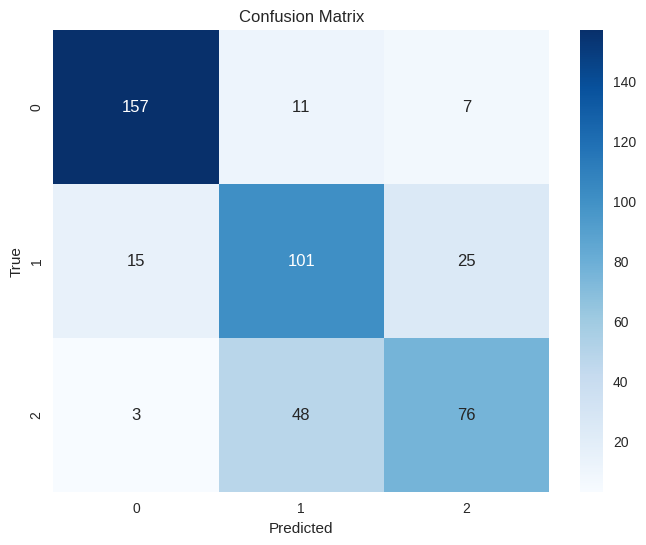

In [337]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)
#print(f"Accuracy en el conjunto de prueba: {accuracy}")

# Predecir las categorías en el conjunto de prueba
#y_pred = model.predict(X_test_scaled)

# Convertir las predicciones de one-hot encoding a etiquetas
#y_test_labels = np.argmax(y_test, axis=1)
#y_pred_labels = np.argmax(y_pred, axis=1)

# Mostrar el reporte de clasificación y la matriz de confusión
#print(classification_report(y_test_labels, y_pred_labels))
#print(confusion_matrix(y_test_labels, y_pred_labels))


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Realizar predicciones en el conjunto de prueba
y_test_pred = model.predict(X_test_scaled)
y_test_pred_classes = y_test_pred.argmax(axis=1)

# Convertir las etiquetas originales y predichas a formato uno-dimensional
y_test_labels = y_test.argmax(axis=1)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test_labels, y_test_pred_classes)
precision = precision_score(y_test_labels, y_test_pred_classes, average='weighted')
recall = recall_score(y_test_labels, y_test_pred_classes, average='weighted')
f1 = f1_score(y_test_labels, y_test_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test_labels, y_test_pred_classes)

# Mostrar los resultados
print(f"Exactitud: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matriz de Confusión:\n{conf_matrix}")

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Selección de parámetros para el modelo:

- Epochs: Se seleccionó 50 por encima de 10 para observar cómo se comporta el modelo durante el entrenamiento. Se consideró este valor para que el modelo tenga más tiempo de aprender los patrones de los datos.


- Batch_size: Se utilizó 32 por encima de 64 para reducir el uso de memoria y el tiempo de entrenamiento.


- Verbose: Se dejó el valor 1 como el de la clase, para visualizar el procesamiento del modelo.

- optimizer=Adam(learning_rate=0.001): Adam: Optimizador que combina las ventajas de otros dos optimizadores: AdaGrad y RMSProp. Es eficiente y robusto. learning_rate=0.001: Tasa de aprendizaje. Controla el tamaño de los pasos que da el optimizador al buscar minimizar la función de pérdida.

- loss='categorical_crossentropy': Función de pérdida utilizada para problemas de clasificación multicategoría. Calcula la diferencia entre las probabilidades predichas y las reales.

**Análisis de resultados: Métricas de Rendimiento**

- Exactitud (Accuracy): 0.7540

El 75.40% de las predicciones del modelo fueron correctas. En otras palabras, el modelo acertó en la mayoría de los casos, pero hay un 24.60% de error, lo cual es bastante considerable.

- Precisión (Precision): 0.7571

De todas las veces que el modelo predijo una clase específica, el 75.71% de esas predicciones fueron correctas. Esto mide la exactitud de las predicciones positivas del modelo.

- Recall (Sensibilidad): 0.7540

El modelo identificó correctamente el 75.40% de los casos positivos reales. Esto mide la capacidad del modelo para encontrar todos los casos positivos.

- F1-Score: 0.7534

Con un F1-Score de 0.7534, el modelo muestra un equilibrio razonable entre precisión y recall. Es particularmente útil cuando las clases están desbalanceadas.



**Análisis de resultados: Matriz de Confusión:**

La matriz de confusión muestra el número de predicciones correctas e incorrectas distribuidas en cada clase:

Predicción \ Real	Clase 0	Clase 1	Clase 2
Clase 0	157	11	7
Clase 1	15	101	25
Clase 2	3	48	76
Clase 0:

- Verdaderos Positivos (TP): 157, correctamente predichos como Clase 0.

- Falsos Negativos (FN): 18 (11 + 7), que fueron predichos incorrectamente como Clase 1 o Clase 2.

- Falsos Positivos (FP): 18 (15 + 3), que no son Clase 0 pero fueron predichos como Clase 0.

Clase 1:

- Verdaderos Positivos (TP): 101, correctamente predichos como Clase 1.

- Falsos Negativos (FN): 40 (15 + 25), que fueron predichos incorrectamente como Clase 0 o Clase 2.

- Falsos Positivos (FP): 59 (11 + 48), que no son Clase 1 pero fueron predichos como Clase 1.

Clase 2:

- Verdaderos Positivos (TP): 76, correctamente predichos como Clase 2.

- Falsos Negativos (FN): 51 (3 + 48), que fueron predichos incorrectamente como Clase 0 o Clase 1.

- Falsos Positivos (FP): 32 (7 + 25), que no son Clase 2 pero fueron predichos como Clase 2.

**Análisis de Resultados: General**

El modelo muestra un rendimiento razonablemente bueno con una exactitud del 75.40%. Sin embargo, la matriz de confusión indica áreas específicas donde el modelo podría mejorar, como:

La confusión entre las Clases 1 y 2, que se observa con un número significativo de falsos positivos y falsos negativos.

El balance de precisión y recall es decente, pero puede beneficiarse de ajustes adicionales en los hiperparámetros o incluso en el preprocesamiento de los datos.

Por lo tanto, el modelo MLP ha demostrado ser bastante efectivo en la clasificación, pero hay espacio para mejoras. Ajustar el modelo, balancear mejor las clases y realizar más preprocesamiento pueden ayudar a mejorar la precisión y otras métricas de rendimiento.

**Opciones para mejorar los resultados:**

- Reducir el número de capas y neuronas

- Implementar Early Stopping

- Añadir Regularización

- Utililzar otro tipo de escalamiento (Ej: MinMaxScaler)

A continuación, se procede a graficar las curvas de pérdida y precisión para comprobar el rendimiento del modelo.

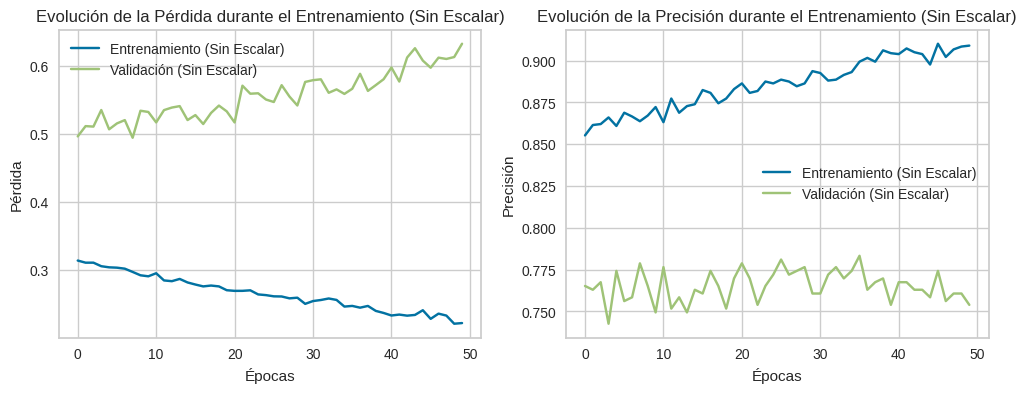

In [338]:
# Graficar las curvas de pérdida y precisión sin Escalar
plt.figure(figsize=(12, 4))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento (Sin Escalar)')
plt.plot(history.history['val_loss'], label='Validación (Sin Escalar)')
plt.title('Evolución de la Pérdida durante el Entrenamiento (Sin Escalar)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento (Sin Escalar)')
plt.plot(history.history['val_accuracy'], label='Validación (Sin Escalar)')
plt.title('Evolución de la Precisión durante el Entrenamiento (Sin Escalar)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()


**Observaciones:**

Gráfico de Evolución de la Pérdida:

- La línea azul (entrenamiento) muestra una tendencia descendente gradual, empezando en ~0.3 y terminando cerca de 0.2.
- La línea verde (validación) muestra una tendencia ascendente preocupante, comenzando en ~0.5 y aumentando hasta ~0.6.
- La divergencia creciente entre las líneas de entrenamiento y validación es un claro indicador de sobreajuste (overfitting).

Gráfico de Evolución de la Precisión:

- La línea azul (entrenamiento) muestra un aumento constante en la precisión, desde ~0.85 hasta ~0.9.
- La línea verde (validación) se mantiene relativamente estable pero fluctuante alrededor de 0.75.
- La brecha creciente entre entrenamiento y validación refuerza la evidencia de sobreajuste

Problemas identificados:

- Sobreajuste significativo: El modelo está memorizando los datos de entrenamiento en lugar de aprender patrones generalizables.
- Rendimiento pobre en validación: La precisión de validación es considerablemente menor que la de entrenamiento.
- Tendencias opuestas: Mientras el rendimiento en entrenamiento mejora, el rendimiento en validación empeora.


**Recomendaciones:**

Estos resultados sugieren que el modelo necesita ajustes significativos para mejorar su capacidad de generalización. Así como mencionamos previamente, se podrían utilizar las siguientes opciones para lograr una mejora del modelo:

- Implementar técnicas de regularización.
- Considerar una arquitectura de modelo más simple.
- Aplicar early stopping para evitar el sobreajuste.
- Utilizar técnicas de escalado de datos.
- Revisar y posiblemente aumentar el conjunto de datos de entrenamiento.



## 5. Discusión

Debido a que en todo el notebook se realizaron análisis. En esta sección, se realiza un breve resumen acerca del dataset analizado:


Primeramente, se implementó ingeniería de caracteríticas para obtener un dataset con columnas más significativas para el problema. Se logró obtener una agrupación entre valores demográficos y valores de compra.

No obstante, al realizar el análisis no supervisado, en el cual se escogió el K-means, se pudo ver que la técnica utilizada no lograba separar eficientemente los clusters.

Aparentemente, a partir de este punto surgieron inconvenientes con respecto a las métricas de desempeño. Así también, supongo que una vez realizado el proceso de modelado, al escoger la capa de activación softmax y la función de pérdida cross-entropy, el desempeño se vio afectado de manera aún más significativa debido a que se tuvo que implementar varios procesos de transformación de datos.

Posteriormente, al evaluar el modelo, las métricas dadas no fueron las esperadas, sin embargo, se logró ver que hay muchas oportunidades de mejora en los análisis. Por lo tanto, es posible realizar ajustes siguiendo las recomendaciones dadas.